In [1]:
import sys
sys.version

'3.9.1 (default, Dec 11 2020, 09:29:25) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import yfinance as yf
yf.pdr_override()
import pandas as pd
from itertools import permutations
from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np


In [3]:
symbols = pd.read_csv("../data/nasdaqtraded.txt", delimiter="|")
all_symbols = symbols.query('`Listing Exchange` == "Q"')['Symbol'].str.cat(sep = ' ')
# stocks_beginning = yf.download(all_symbols, start="2007-12-31", end="2008-01-02")
# stocks_ending = yf.download(all_symbols, start="2020-12-31", end="2021-01-02")
# stocks = pd.concat([stocks_beginning, stocks_ending])
stocks = yf.download(all_symbols, start="2007-12-31", end="2021-01-02")

[*****************     36%                       ]  1431 of 4026 completed

KeyboardInterrupt: 

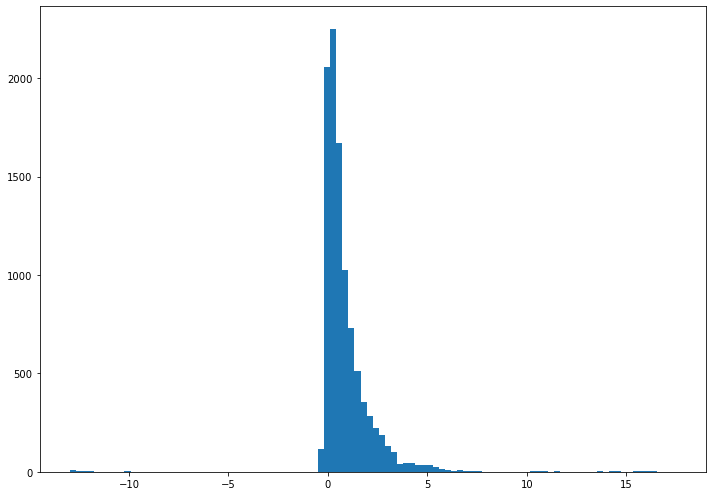

In [6]:
def get_portfolio_chg(trials, stocks, sample_size):
    gain_loss = stocks['Adj Close'].iloc[len(stocks)-1]/stocks['Adj Close'].iloc[0] - 1
    gain_loss = gain_loss.fillna(0)
    portfolios = defaultdict(int)
    for i in range(trials):
        sampled_stocks = gain_loss.sample(sample_size)
        sampled_mean = sampled_stocks.mean()
        portfolios[i] = {'stocks': sampled_stocks, 'gain_loss': sampled_mean}
    return portfolios

result = pd.DataFrame(get_portfolio_chg(10000, stocks, 10))

fig, axs = plt.subplots(1, 1,
                            figsize = (10,7),
                            tight_layout = True)

axs.hist(np.array(result.iloc[1]), bins = 100)

plt.show()

In [ ]:
result